In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)


df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Customer_LTV_Prediction/archive/Data/final_sairam.csv')

Mounted at /content/drive


In [3]:
df.head()

,ID,Frequency,InstlmentMode,LoanStatus,PaymentMode,BranchID,Tenure,AssetCost,AmountFinance,EMI,...,#Ownerships-Accepted,Closed-Accounts,Active-Accounts,Disbursed-Amt,Current-Bal,Overdue-Amt,Write-Off-Amount,AuthYear,Last-Reported-Year,BankTenure
0,1,Monthly,Arrear,Closed,PDC_E,1,48,450000,275000.0,24000.0,...,1,5,4,2.751690e+05,1.546315e+05,37873.0,0.0,2012,2020,8
1,2,Monthly,Advance,Closed,PDC,333,47,485000,350000.0,10500.0,...,2,6,7,1.393622e+06,1.478494e+06,0.0,0.0,2012,2020,8
2,3,Quatrly,Arrear,Active,Direct Debit,1,68,690000,519728.0,38300.0,...,3,19,12,1.196248e+05,1.877423e+05,51745.0,0.0,2017,2023,6
3,7,Monthly,Advance,Closed,Billed,125,48,480000,400000.0,11600.0,...,1,2,2,3.181382e+05,6.240000e+05,0.0,0.0,2013,2020,7
4,8,Monthly,Arrear,Closed,Billed,152,44,619265,440000.0,15000.0,...,3,2,5,2.893166e+05,2.435298e+05,35185.0,0.0,2011,2020,9


In [4]:
df.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Tenure', 'AssetCost', 'AmountFinance', 'EMI',
       'ManufacturerID', 'LTV', 'SEX', 'AGE', 'MonthlyIncome', 'State',
       'Top-up Month', 'LTFS-Tradelines', 'NonLTFS-Tradelines',
       'Primary-Applicants', 'Co-Applicants', '#TypeOfLoans',
       'Contributor-Banks', 'Bank-lists', '#Ownerships-Accepted',
       'Closed-Accounts', 'Active-Accounts', 'Disbursed-Amt', 'Current-Bal',
       'Overdue-Amt', 'Write-Off-Amount', 'AuthYear', 'Last-Reported-Year',
       'BankTenure'],
      dtype='object')

In [5]:
df.shape

(128655, 34)

In [6]:
df.isnull().sum()

ID                        0
Frequency                 0
InstlmentMode             0
LoanStatus                0
PaymentMode               0
BranchID                  0
Tenure                    0
AssetCost                 0
AmountFinance             0
EMI                       0
ManufacturerID            0
LTV                       0
SEX                      59
AGE                      59
MonthlyIncome           234
State                     0
Top-up Month              0
LTFS-Tradelines           0
NonLTFS-Tradelines        0
Primary-Applicants        0
Co-Applicants             0
#TypeOfLoans              0
Contributor-Banks         0
Bank-lists                0
#Ownerships-Accepted      0
Closed-Accounts           0
Active-Accounts           0
Disbursed-Amt             0
Current-Bal               0
Overdue-Amt               0
Write-Off-Amount          0
AuthYear                  0
Last-Reported-Year        0
BankTenure                0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
# Dropping the ID columns because they are just numbers with no significance of their own. 

df.drop(['ID'], axis=1, inplace=True)

In [9]:
print(df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10))

<ipython-input-9-0e470b4580a3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr().abs().unstack().sort_values(ascending=False).drop_duplicates().head(10))


BranchID            BranchID             1.000000
Primary-Applicants  LTFS-Tradelines      0.992624
                    Closed-Accounts      0.925534
LTFS-Tradelines     Closed-Accounts      0.920105
#TypeOfLoans        Contributor-Banks    0.773964
Primary-Applicants  #TypeOfLoans         0.763841
LTFS-Tradelines     #TypeOfLoans         0.757639
Primary-Applicants  Active-Accounts      0.747804
LTFS-Tradelines     Active-Accounts      0.741017
LTV                 AmountFinance        0.708584
dtype: float64


In [10]:
# Dropping highly correlated features

df.drop(['#TypeOfLoans'], axis=1, inplace=True)

In [11]:
# Encoding the categorical features

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = encoder.fit_transform(df[col])

In [12]:
# Target variable and features

X = df.drop(['LTV'], axis=1)
y = df['LTV']



In [13]:
# Scaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [15]:
x_train = pd.DataFrame(x_train, columns=X.columns)
x_test = pd.DataFrame(x_test, columns=X.columns)

In [16]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_preds_tree = dt.predict(x_test)
print("Mean Absolute Error for the Decision Tree Regressor: ", mae(y_test, y_preds_tree))
print("Root Mean Squared Error for Decision Tree Regressor: ", np.sqrt(mse(y_test, y_preds_tree)))
print()

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_preds_forest = rf.predict(x_test)
print("Mean Absolute Error for the Random Forest Regressor: ", mae(y_test, y_preds_forest))
print("Root Mean Squared Error for Random Forest Regressor: ", np.sqrt(mse(y_test, y_preds_forest)))
print()


# Support Vector Regressor
from sklearn.svm import SVR
sup = SVR()
sup.fit(x_train, y_train)
y_preds_sup = sup.predict(x_test)
print("Mean Absolute Error for the SVM  Regressor: ", mae(y_test, y_preds_sup))
print("Root Mean Squared Error for SVM Regressor: ", np.sqrt(mse(y_test, y_preds_sup)))
print()


# XGBoost Regressor
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_preds_xgb = xgb.predict(x_test)
print("Mean Absolute Error for XGBoost Regressor: ", mae(y_test, y_preds_xgb))
print("Root Mean Squared Error for XGBoost Regressor: ", np.sqrt(mse(y_test, y_preds_xgb)))
print()

# Light GBM Regressor
import lightgbm as ltb
light = ltb.LGBMRegressor()
light.fit(x_train, y_train)
y_preds_light = light.predict(x_test)
print("Mean Absolute Error for Light GBM Regressor:  ", mae(y_test, y_preds_light))
print("Root Mean Squared Error for Light GBM Regressor: ", np.sqrt(mse(y_test, y_preds_light)))

# Gaussian Process Regressor
#import sklearn.gaussian_process as gp
#kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
#gaussian =  gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
#gaussian.fit(x_train, y_train)
#y_preds_gaussian = gaussian.predict(x_test)
#print("Mean Absolute Error for Gaussian Process Regressor: ", mae(y_test, y_preds_gaussian))
#print("Root Mean Squared Error for Gaussian Process Regressor: ", np.sqrt(mse(y_test, y_preds_gaussian)))


# Elastic Net Regression
#from sklearn.linear_model import ElasticNet
#elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
#elastic.fit(x_train, y_train)
#y_preds_elastic = elastic.predict(x_test)
#print("Mean Absolute Error for ElasticNet Regressor: ", mae(y_test, y_preds_elastic))
#print("Root Mean Squared Error for ElasticNet Regressor: ", np.sqrt(mse(y_test, y_preds_elastic)))


# Least Angle Regression
#from sklearn.linear_model import LassoLars
#lasso = LassoLars(alpha=0.1)
##lasso.fit(x_train, y_train)
#y_preds_lasso = lasso.predict(x_test)
#print("Mean Absolute Error for Least Angle Regressor: ", mae(y_test, y_preds_lasso))
#print("Root Mean Squared Error for Least Angle Regressor: ", np.sqrt(mse(y_test, y_preds_lasso)))






Mean Absolute Error for the Decision Tree Regressor:  4.395219795195266
Root Mean Squared Error for Decision Tree Regressor:  7.026564683306196

Mean Absolute Error for the Random Forest Regressor:  4.037628435151657
Root Mean Squared Error for Random Forest Regressor:  5.138852865336931

Mean Absolute Error for the SVM  Regressor:  4.4944049473611525
Root Mean Squared Error for SVM Regressor:  6.147964335837656

Mean Absolute Error for XGBoost Regressor:  3.821927272957935
Root Mean Squared Error for XGBoost Regressor:  4.905816056847234

Mean Absolute Error for Light GBM Regressor:   3.875039745468939
Root Mean Squared Error for Light GBM Regressor:  4.895160992362032


Moving ahead with lightgbm regressor

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

<Figure size 1000x800 with 0 Axes>

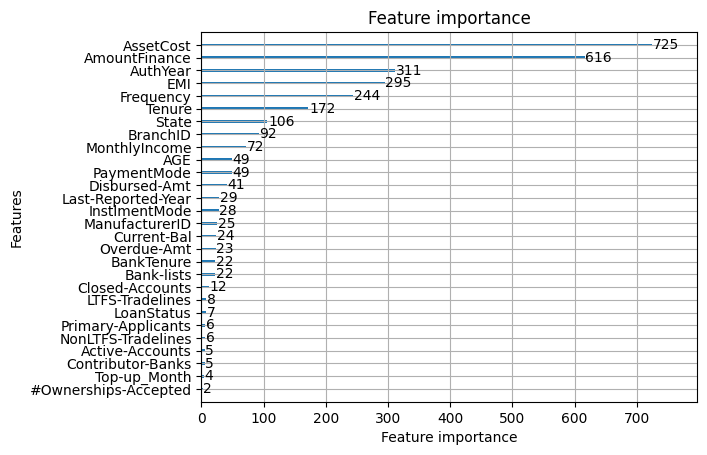

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
ltb.plot_importance(light)

Light GBM Model with the Top N most important features

In [18]:
new_X = X[['AssetCost', 'AmountFinance', 'AuthYear', 'EMI', 'Frequency', 'Tenure', 'State', 'MonthlyIncome', 'PaymentMode', 'Disbursed-Amt']]
new_X_scaled = scaler.fit_transform(new_X)
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(new_X_scaled, y, test_size=0.2)



new_light = ltb.LGBMRegressor()
new_light.fit(x_train_new, y_train_new)

y_preds_light_new = new_light.predict(x_test_new)
print("Mean Absolute Error for Light GBM with top 10 most important features: ", mae(y_test_new, y_preds_light_new))
print("Root Mean Squared Error for Light GBM with top 10 most important features:  ", np.sqrt(mse(y_test_new, y_preds_light_new)))



Mean Absolute Error for Light GBM with top 10 most important features:  3.8841301100466583
Root Mean Squared Error for Light GBM with top 10 most important features:   4.88111910945443


Hyperparameter Tuning of LightGBM Regressor

In [20]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:

grid = dict()
grid['n_estimators'] = [10, 50, 100, 200, 300, 400, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['subsample'] = [0.5, 0.7, 1.0]
grid['max_depth'] = [3, 4, 5, 10, 15, 20]

cv = KFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(estimator=light, param_grid=grid, n_jobs=-1, cv=cv, scoring='neg_mean_absolute_error')


grid_result = grid_search.fit(x_train, y_train)


print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))




KeyboardInterrupt: ignored

In [22]:
best_light = ltb.LGBMRegressor(learning_rate=0.1, max_depth=20, n_estimators=500, subsample=0.5, application='regression' )
best_light.fit(x_train, y_train)
y_preds_light_best = best_light.predict(x_test)
print("Mean Absolute Error for Light GBM after Hyperparameter Tuning: ", mae(y_test, y_preds_light_best))
print("Root Mean Squared Error for Light GBM after Hyperparameter Tuning: ", np.sqrt(mse(y_test, y_preds_light_best)))

Mean Absolute Error for Light GBM after Hyperparameter Tuning:  3.7628834648666127
Root Mean Squared Error for Light GBM after Hyperparameter Tuning:  4.850700139617256


In [ ]:
import pickle
pickle.dump(best_light, open('my_light.pkl', 'wb'))